# VIRTUAL-B CLUSTERING
1. Full df
2. Preprocessing
3. Profile clusters
4. Subclusters
5. Investment clusters
6. Subclusters
7. Linking profiles and investments
8. Pivot table
9. Clusters evaluation
10. Client evaluation

In [1]:
# import

import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss, pairwise_distances
from math import sqrt
from sklearn import preprocessing
from sklearn.cluster import KMeans, k_means
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Full df

In [2]:
df = pd.read_csv('virtualbcluster.csv', error_bad_lines=False, sep=';')
df

,ClientID,RiskPropension,PortfolioRisk,ClientInvestmentHorizon,PortfolioHorizon,ClientKnowledgeExperience,ClientPotentialIndex,IncomeHighLow,Sex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,PanicMood,ClientDateStart,NoTrustInBanks,Prov,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash
0,Client1,0.597553,0.088,2.077.883.137,37.027,0.285714,0.148466,0,1,13719,22,0.079215,0.797512,0.204401,0.633762,0.114803,0,2015,0,PA,0.5730,0.4270,0.0000,0.0000,0.0000
1,Client2,0.501486,0.062,1.522.847.727,27.327,0.714286,0.152761,0,1,45973,61,0.281602,0.174660,0.153599,0.629258,0.505362,0,2016,0,RM,0.5341,0.4466,0.0124,0.0000,0.0070
2,Client3,0.554108,0.000,9.675.789.154,0.5,0.523810,0.243558,0,0,10233,24,0.124015,0.882995,0.769608,0.663677,0.069924,0,2015,0,BS,0.0000,0.0000,0.0000,0.0000,1.0000
3,Client4,0.440729,0.032,9.563.829.219,25.676,0.619048,0.089571,0,0,25144,46,0.209610,0.548211,0.226218,0.218019,0.415670,0,2015,0,RE,0.6428,0.1220,0.0407,0.1943,0.0002
4,Client5,0.540528,0.038,179.415.327,24.911,0.428571,0.162577,0,0,222892,57,0.320086,0.907644,0.703936,0.506315,0.335057,0,2015,0,MI,0.1707,0.2701,0.5332,0.0045,0.0215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Client4996,0.417480,0.061,3.961.646.057,34.684,0.619048,0.174847,0,0,26348,52,0.285918,0.448543,0.211391,0.564139,0.541309,0,2006,0,CO,0.3792,0.4520,0.0671,0.0830,0.0187
4996,Client4997,0.594193,0.024,1.289.795.979,10.325,0.809524,0.292025,0,1,1002570,45,0.774590,0.284940,0.707348,0.557441,0.577970,0,2016,1,FI,0.9012,0.0283,0.0197,0.0495,0.0012
4997,Client4998,0.577775,0.000,1.548.186.424,0.5,0.523810,0.096933,0,1,31032,43,0.221488,0.524767,0.729378,0.580418,0.421414,0,2016,0,PU,0.0000,0.0000,0.0000,0.0000,1.0000
4998,Client4999,0.402162,0.015,7.22,17.193,0.523810,0.142945,0,0,50243,65,0.320920,0.447410,0.337642,0.117647,0.530526,0,2015,0,SA,0.6541,0.1626,0.1635,0.0000,0.0198


In [3]:
df.describe()

,RiskPropension,PortfolioRisk,ClientKnowledgeExperience,ClientPotentialIndex,IncomeHighLow,Sex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,PanicMood,ClientDateStart,NoTrustInBanks,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.488939,0.052585,0.619686,0.256095,0.078400,0.505600,1.898872e+05,54.575400,0.338791,0.476238,0.376164,0.417580,0.484838,-0.013200,2014.056400,0.116200,0.498821,0.230302,0.047452,0.040530,0.174540
std,0.130907,0.165766,0.164812,0.174461,0.268827,0.500019,5.234644e+05,17.574325,0.188517,0.259825,0.211200,0.239535,0.199010,0.114142,5.327898,0.320497,0.274451,0.198136,0.094192,0.087306,0.303692
min,0.031131,0.000000,0.047619,0.000000,0.000000,0.000000,1.000000e+04,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1983.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.388924,0.026000,0.523810,0.128834,0.000000,0.000000,2.773650e+04,43.000000,0.215574,0.221779,0.216692,0.145318,0.385020,0.000000,2015.000000,0.000000,0.329475,0.066875,0.000000,0.000000,0.001500
50%,0.476067,0.042000,0.619048,0.216564,0.000000,1.000000,6.696500e+04,54.000000,0.299619,0.476906,0.296553,0.507460,0.519600,0.000000,2015.000000,0.000000,0.533350,0.199150,0.023100,0.000000,0.026900
75%,0.581871,0.059000,0.714286,0.350307,0.000000,1.000000,1.639182e+05,68.000000,0.394999,0.747571,0.616763,0.609014,0.629046,0.000000,2016.000000,0.000000,0.694300,0.348025,0.058000,0.046350,0.159975
max,1.000000,6.060000,1.000000,0.906748,1.000000,1.000000,1.436670e+07,103.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


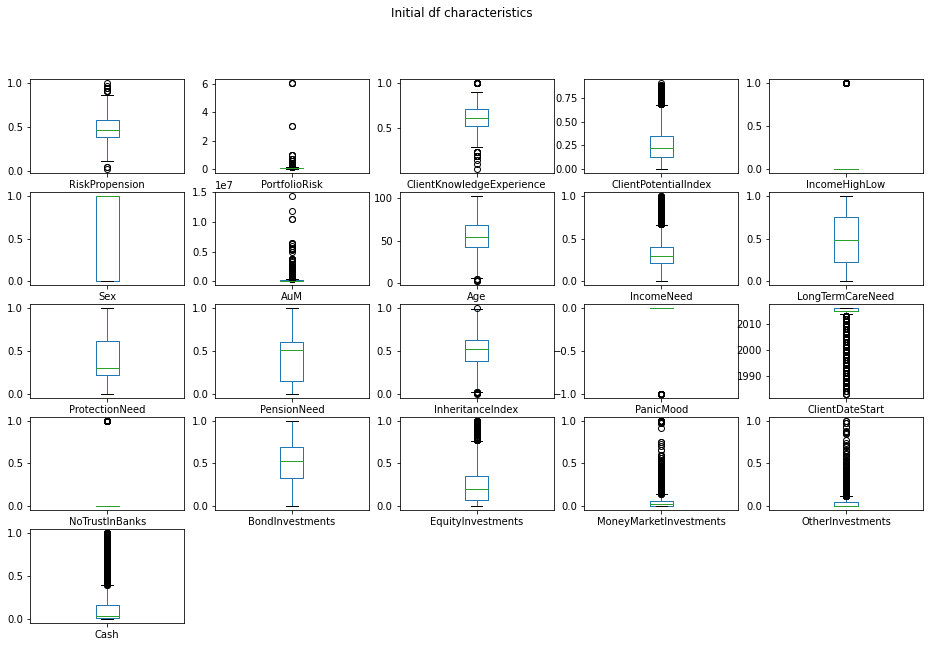

In [4]:
df.plot(kind='box',
        subplots=True,
        layout=(5,5),
        figsize=(16,10),
        title='Initial df characteristics');

## Preprocessing

In [5]:
# We want to include spatial data:
df.drop(columns=['Prov'], inplace=True)
df.set_index(['ClientID'], inplace=True)
df.describe()

,RiskPropension,PortfolioRisk,ClientKnowledgeExperience,ClientPotentialIndex,IncomeHighLow,Sex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,PanicMood,ClientDateStart,NoTrustInBanks,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.488939,0.052585,0.619686,0.256095,0.078400,0.505600,1.898872e+05,54.575400,0.338791,0.476238,0.376164,0.417580,0.484838,-0.013200,2014.056400,0.116200,0.498821,0.230302,0.047452,0.040530,0.174540
std,0.130907,0.165766,0.164812,0.174461,0.268827,0.500019,5.234644e+05,17.574325,0.188517,0.259825,0.211200,0.239535,0.199010,0.114142,5.327898,0.320497,0.274451,0.198136,0.094192,0.087306,0.303692
min,0.031131,0.000000,0.047619,0.000000,0.000000,0.000000,1.000000e+04,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1983.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.388924,0.026000,0.523810,0.128834,0.000000,0.000000,2.773650e+04,43.000000,0.215574,0.221779,0.216692,0.145318,0.385020,0.000000,2015.000000,0.000000,0.329475,0.066875,0.000000,0.000000,0.001500
50%,0.476067,0.042000,0.619048,0.216564,0.000000,1.000000,6.696500e+04,54.000000,0.299619,0.476906,0.296553,0.507460,0.519600,0.000000,2015.000000,0.000000,0.533350,0.199150,0.023100,0.000000,0.026900
75%,0.581871,0.059000,0.714286,0.350307,0.000000,1.000000,1.639182e+05,68.000000,0.394999,0.747571,0.616763,0.609014,0.629046,0.000000,2016.000000,0.000000,0.694300,0.348025,0.058000,0.046350,0.159975
max,1.000000,6.060000,1.000000,0.906748,1.000000,1.000000,1.436670e+07,103.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# A few portfolio values are over 1.
df = df.loc[df['PortfolioRisk'] <= 1]
# A few AuM values are magnitudes over the mean.
df = df.loc[df['AuM'] <= 1000000]
# The investment values should sum to one: do they?
df['InvestmentsSum'] = df.EquityInvestments + df.BondInvestments + df.MoneyMarketInvestments + df.OtherInvestments + df.Cash
sum_issue = df.loc[(df.InvestmentsSum < 0.99) | (df.InvestmentsSum > 1.01)] # very tiny differences may be due to approximation errors
# Removing the records where the sum of investments is not 1.
df.append(sum_issue).drop_duplicates(keep=False)
df.describe() # 148 records were cut during preprocessing, corresponding to the 3% of the dataset.

,RiskPropension,PortfolioRisk,ClientKnowledgeExperience,ClientPotentialIndex,IncomeHighLow,Sex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,PanicMood,ClientDateStart,NoTrustInBanks,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash,InvestmentsSum
count,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000
mean,0.489414,0.047499,0.614160,0.248812,0.069868,0.505153,129068.219085,54.272259,0.326966,0.477924,0.376890,0.422058,0.477795,-0.013397,2014.025144,0.114180,0.496062,0.230186,0.047201,0.040513,0.177596,0.991558
std,0.131840,0.047910,0.162543,0.168533,0.254951,0.500025,167716.419612,17.562747,0.175670,0.259825,0.212062,0.238956,0.195771,0.114977,5.372555,0.318062,0.276195,0.199525,0.095133,0.088324,0.306203,0.079029
min,0.031131,0.000000,0.047619,0.000000,0.000000,0.000000,10000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1983.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.388569,0.026000,0.523810,0.125767,0.000000,0.000000,26904.000000,43.000000,0.213156,0.222844,0.216600,0.148772,0.375836,0.000000,2015.000000,0.000000,0.324700,0.064000,0.000000,0.000000,0.001500,1.000000
50%,0.477027,0.042000,0.619048,0.211656,0.000000,1.000000,63036.000000,54.000000,0.294721,0.479965,0.296446,0.510908,0.514336,0.000000,2015.000000,0.000000,0.530400,0.199000,0.022600,0.000000,0.027200,1.000000
75%,0.582993,0.059000,0.714286,0.340491,0.000000,1.000000,151417.750000,67.000000,0.386265,0.749376,0.621770,0.611313,0.623417,0.000000,2016.000000,0.000000,0.691700,0.349950,0.057600,0.045200,0.165200,1.000000
max,1.000000,1.000000,1.000000,0.906748,1.000000,1.000000,995297.000000,103.000000,0.985063,1.000000,1.000000,1.000000,0.915842,0.000000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000200


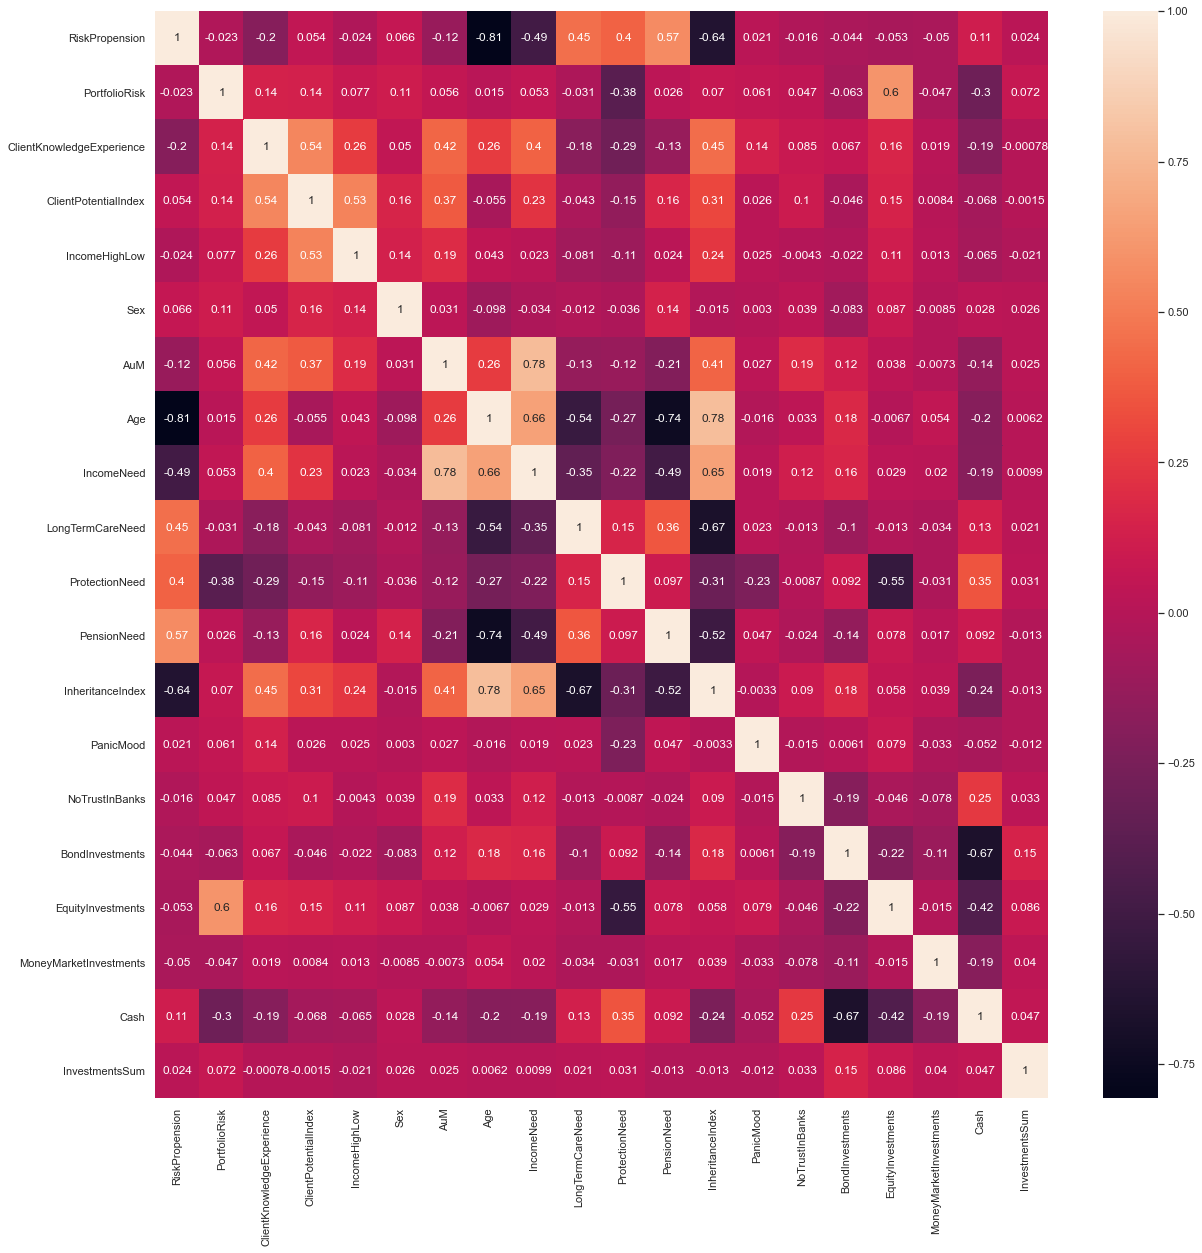

In [7]:
# Are there strong correlations and clear linear combination between attributes?
sns.set(rc={'figure.figsize':(20,20)})
df_corr = df.drop(columns=['ClientInvestmentHorizon','PortfolioHorizon','OtherInvestments','ClientDateStart'])
corrMatrix = df_corr.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

## only profile

In [8]:
profiles = df.drop(columns=['ClientInvestmentHorizon','PortfolioHorizon','BondInvestments','EquityInvestments','MoneyMarketInvestments','OtherInvestments','Cash',
                            'ClientDateStart','IncomeHighLow','PanicMood','NoTrustInBanks', 'Sex'])
profiles.head()

,RiskPropension,PortfolioRisk,ClientKnowledgeExperience,ClientPotentialIndex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,InvestmentsSum
ClientID,,,,,,,,,,,,
Client1,0.597553,0.088,0.285714,0.148466,13719,22,0.079215,0.797512,0.204401,0.633762,0.114803,1.0000
Client2,0.501486,0.062,0.714286,0.152761,45973,61,0.281602,0.174660,0.153599,0.629258,0.505362,1.0001
Client3,0.554108,0.000,0.523810,0.243558,10233,24,0.124015,0.882995,0.769608,0.663677,0.069924,1.0000
Client4,0.440729,0.032,0.619048,0.089571,25144,46,0.209610,0.548211,0.226218,0.218019,0.415670,1.0000
Client5,0.540528,0.038,0.428571,0.162577,222892,57,0.320086,0.907644,0.703936,0.506315,0.335057,1.0000


In [9]:
#Creating a function to plot Box plot and Histogram
def hist_box_plot(df,feature, fig_num):
    sns.set(color_codes = 'Blue', style="whitegrid")
    sns.set_style("whitegrid", {'axes.grid' : False})
    sns.set_context(rc = {'patch.linewidth': 0.0})
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,3))
    filtered = df.loc[~np.isnan(df[feature]), feature]
    sns.boxplot(filtered, ax = ax1, color = 'steelblue') # boxplot
    sns.distplot(filtered, kde=True, hist=True, kde_kws={'linewidth': 1}, color = 'steelblue', ax = ax2) # histogram
    plt.show()
    

sns.set(rc={'figure.figsize':(20,20)})
fig_num=1
for col in profiles.select_dtypes(include=[np.number]).columns:
    if col in ['RiskPropension','PortfolioRisk','ClientKnowledgeExperience','ClientPotentialIndex','AuM','Age','IncomeNeed','LongTermCareNeed','ProtectionNeed','PensionNeed','InheritanceIndex','BondInvestments','EquityInvestments','MoneyMarketInvestments','OtherInvestments','Cash']:
        #hist_box_plot(profiles, col, fig_num)
        fig_num = fig_num + 1

In [10]:
X_p = profiles.values
X_p = preprocessing.minmax_scale(X_p)

# senza interventi: 3 cluster, ottimizzazione di silhouette: 0.27 e inerzia: 0.00064. La PCA non migliora niente.
kmeans = KMeans(n_clusters=4, random_state=2)
kmeans = kmeans.fit(X_p)
lab = kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_p)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,4)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"])

# Attachine the clusters back to our initial Dataset that has all the data
profiles['Clusters'] = predictions

# display
countscldf

# score
metrics.silhouette_score(X_p, lab, metric='euclidean')

0.23825964963180538

## subclusters

In [11]:
# sub1: 3 cluster, silhouette 0.67. La PCA non aumenta quasi niente.
subprof0 = profiles.loc[profiles['Clusters'] == 0]
X_p_0 = subprof0.values
X_p_0 = preprocessing.normalize(X_p_0)

kmeans0 = KMeans(n_clusters=3, random_state=2)
kmeans0 = kmeans0.fit(X_p_0)

lab = kmeans0.labels_

# "predictions" for new data
predictions0 = kmeans0.predict(X_p_0)

# calculating the Counts of the cluster
unique0, counts0 = np.unique(predictions0, return_counts=True)
counts0 = counts0.reshape(1,3)

# Creating a datagrame
countscldf0 = pd.DataFrame(counts0, columns = ["SubCluster0","SubCluster1","SubCluster2"])

subprof0['SubClusters'] = predictions0

# display
countscldf0

# score
metrics.silhouette_score(X_p_0, lab, metric='euclidean')

<ipython-input-11-ea3c7931330e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subprof0['SubClusters'] = predictions0


0.5734475942286794

In [12]:
# sub2: 3 cluster, silhouette 0.68. La PCA non aumenta quasi niente.
subprof1 = profiles.loc[profiles['Clusters'] == 1]
X_p_1 = subprof1.values
X_p_1 = preprocessing.normalize(X_p_1)

kmeans1 = KMeans(n_clusters=3, random_state=2)
kmeans1 = kmeans1.fit(X_p_1)

lab = kmeans1.labels_

# "predictions" for new data
predictions1 = kmeans1.predict(X_p_1)

# calculating the Counts of the cluster
unique1, counts1 = np.unique(predictions1, return_counts=True)
counts1 = counts1.reshape(1,3)

# Creating a datagrame
countscldf1 = pd.DataFrame(counts1, columns = ["SubCluster0","SubCluster1","SubCluster2"])

subprof1['SubClusters'] = predictions1

# display
countscldf1

# score
metrics.silhouette_score(X_p_1, lab, metric='euclidean')

<ipython-input-12-752d0c2c2fcd>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subprof1['SubClusters'] = predictions1


0.6063628044684249

In [13]:
# sub3: 3 cluster, silhouette 0.59. La PCA non aumenta quasi niente.
subprof2 = profiles.loc[profiles['Clusters'] == 2]
X_p_2 = subprof2.values
X_p_2 = preprocessing.normalize(X_p_2)

kmeans2 = KMeans(n_clusters=3, random_state=2)
kmeans2 = kmeans2.fit(X_p_2)

lab = kmeans2.labels_

# "predictions" for new data
predictions2 = kmeans2.predict(X_p_2)

# calculating the Counts of the cluster
unique2, counts2 = np.unique(predictions2, return_counts=True)
counts2 = counts2.reshape(1,3)

# Creating a datagrame
countscldf2 = pd.DataFrame(counts2, columns = ["SubCluster0","SubCluster1","SubCluster2"])

subprof2['SubClusters'] = predictions2

# display
countscldf2

# score
metrics.silhouette_score(X_p_2, lab, metric='euclidean')

<ipython-input-13-8cfc4287fb6c>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subprof2['SubClusters'] = predictions2


0.6491976169068464

In [14]:
# sub4: 3 cluster, silhouette 0.59. La PCA non aumenta quasi niente.
subprof3 = profiles.loc[profiles['Clusters'] == 3]
X_p_3 = subprof3.values
X_p_3 = preprocessing.normalize(X_p_3)

kmeans3 = KMeans(n_clusters=3, random_state=2)
kmeans3 = kmeans3.fit(X_p_3)

lab = kmeans3.labels_

# "predictions" for new data
predictions3 = kmeans3.predict(X_p_3)

# calculating the Counts of the cluster
unique3, counts3 = np.unique(predictions3, return_counts=True)
counts3 = counts3.reshape(1,3)

# Creating a datagrame
countscldf3 = pd.DataFrame(counts3, columns = ["SubCluster0","SubCluster1","SubCluster2"])

subprof3['SubClusters'] = predictions3

# display
countscldf3
# score
metrics.silhouette_score(X_p_3, lab, metric='euclidean')

<ipython-input-14-4997a75c7c55>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subprof3['SubClusters'] = predictions3


0.6792883297440192

In [15]:
# after clustering on profiles, attaching investments back to evaluate correlation
prof_sub = pd.concat([subprof0, subprof1, subprof2, subprof3])
df_sub = prof_sub.merge(df[['BondInvestments', 'EquityInvestments', 'MoneyMarketInvestments', 'OtherInvestments', 'Cash']], left_index=True, right_index=True)
df_sub

,RiskPropension,PortfolioRisk,ClientKnowledgeExperience,ClientPotentialIndex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,InvestmentsSum,Clusters,SubClusters,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash
ClientID,,,,,,,,,,,,,,,,,,,
Client1,0.597553,0.088,0.285714,0.148466,13719,22,0.079215,0.797512,0.204401,0.633762,0.114803,1.0000,0,1,0.5730,0.4270,0.0000,0.0000,0.0000
Client3,0.554108,0.000,0.523810,0.243558,10233,24,0.124015,0.882995,0.769608,0.663677,0.069924,1.0000,0,2,0.0000,0.0000,0.0000,0.0000,1.0000
Client5,0.540528,0.038,0.428571,0.162577,222892,57,0.320086,0.907644,0.703936,0.506315,0.335057,1.0000,0,0,0.1707,0.2701,0.5332,0.0045,0.0215
Client10,0.557302,0.021,0.428571,0.074847,25948,52,0.214093,0.514127,0.707950,0.541626,0.488134,1.0001,0,1,0.6743,0.1833,0.1259,0.0000,0.0166
Client12,0.584268,0.065,0.285714,0.143558,16933,24,0.114622,0.811150,0.295798,0.675703,0.105624,1.0000,0,1,0.0000,0.0000,0.0000,0.0000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Client4979,0.268768,0.000,0.428571,0.133129,20578,69,0.360268,0.278418,0.395041,0.101260,0.562489,1.0000,3,1,0.0000,0.0000,0.0000,0.0000,1.0000
Client4980,0.377883,0.059,0.428571,0.042945,449894,65,0.631625,0.252914,0.284737,0.141117,0.580935,0.9999,3,0,0.5142,0.1904,0.0832,0.0000,0.2121
Client4981,0.473362,0.070,0.619048,0.333129,177033,69,0.358568,0.407431,0.304010,0.116154,0.662874,1.0000,3,0,0.7114,0.2797,0.0089,0.0000,0.0000


In [16]:
# what's the clusters population?
df_sub.groupby(['Clusters']).RiskPropension.count()

Clusters
0    1281
1     564
2    1763
3    1244
Name: RiskPropension, dtype: int64

In [17]:
# how about clusters properties?
df_sub.groupby(['Clusters']).mean()

,RiskPropension,PortfolioRisk,ClientKnowledgeExperience,ClientPotentialIndex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,InvestmentsSum,SubClusters,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash
Clusters,,,,,,,,,,,,,,,,,,
0,0.618249,0.041376,0.519163,0.203788,58125.800156,35.402810,0.181139,0.773414,0.522539,0.579838,0.217139,0.997388,0.611241,0.442968,0.198809,0.039902,0.028809,0.286900
1,0.445758,0.055248,0.782337,0.422108,495806.948582,64.750000,0.677542,0.393776,0.309158,0.296442,0.672486,0.994084,0.581560,0.557262,0.257805,0.046526,0.047367,0.085123
2,0.492878,0.053076,0.637901,0.283755,86045.517300,51.444129,0.280690,0.394600,0.308364,0.562991,0.517455,0.987551,0.836075,0.479420,0.262710,0.053779,0.041985,0.149656
3,0.371629,0.042387,0.602090,0.167087,96821.931672,72.960611,0.383771,0.329885,0.354732,0.116805,0.601728,0.990088,0.334405,0.546572,0.203883,0.045700,0.047370,0.146564


In [18]:
df_sub.groupby(['Clusters']).std()

,RiskPropension,PortfolioRisk,ClientKnowledgeExperience,ClientPotentialIndex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,InvestmentsSum,SubClusters,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash
Clusters,,,,,,,,,,,,,,,,,,
0,0.101947,0.043755,0.147042,0.102868,73941.944351,11.858678,0.088109,0.118988,0.249718,0.154956,0.128556,0.032642,0.707327,0.306449,0.201326,0.085753,0.088500,0.366577
1,0.103079,0.033301,0.111454,0.169505,206013.854012,12.687650,0.168717,0.233213,0.152238,0.212791,0.121219,0.045668,0.905135,0.209465,0.176539,0.051758,0.066487,0.185932
2,0.096313,0.061786,0.152029,0.179254,79932.619998,8.706895,0.080460,0.205236,0.193982,0.117524,0.090926,0.097930,0.557492,0.260671,0.210217,0.121419,0.089594,0.277985
3,0.085429,0.030608,0.139198,0.131370,77375.079873,10.047397,0.080145,0.198908,0.127890,0.061531,0.096754,0.093140,0.587403,0.277952,0.182521,0.074282,0.093733,0.289954


In [19]:
# what about the subclusters?
df_sub.groupby(['Clusters', 'SubClusters']).RiskPropension.count()

Clusters  SubClusters
0         0               666
          1               447
          2               168
1         0               398
          1                 4
          2               162
2         0               442
          1              1168
          2               153
3         0               904
          1               264
          2                76
Name: RiskPropension, dtype: int64

In [20]:
df_sub.groupby(['Clusters', 'SubClusters']).mean()

RiskPropension  PortfolioRisk  \
Clusters SubClusters                                  
0        0                  0.630349       0.042141   
         1                  0.628281       0.039671   
         2                  0.543589       0.042881   
1        0                  0.461799       0.055181   
         1                  0.395690       0.070250   
         2                  0.407585       0.055043   
2        0                  0.476393       0.058604   
         1                  0.508457       0.051619   
         2                  0.421574       0.048229   
3        0                  0.383939       0.044488   
         1                  0.347823       0.038886   
         2                  0.307898       0.029553   

                      ClientKnowledgeExperience  ClientPotentialIndex  \
Clusters SubClusters                                                    
0        0                             0.544974              0.220192   
         1                             0.490785              0.185465   
         2                             0.492347              0.187511   
1        0                             0.783680              0.426075   
         1                             0.809524              0.706902   
         2                             0.778366              0.405328   
2        0                             0.587804              0.226508   
         1                             0.662671              0.310561   
         2                             0.593526              0.244497   
3        0                             0.625685              0.189367   
         1                             0.547439              0.110950   
         2                             0.511278              0.097070   

                                AuM        Age  IncomeNeed  LongTermCareNeed  \
Clusters SubClusters                                                           
0        0             94233.969970  35.602102    0.193013          0.779243   
         1             20867.937360  32.630872    0.154819          0.772917   
         2             14115.226190  41.988095    0.204098          0.751630   
1        0            581089.246231  62.527638    0.707664          0.403796   
         1             51113.250000  69.500000    0.395834          0.432207   
         2            297266.333333  70.092593    0.610492          0.368210   
2        0             25678.805430  51.599548    0.267820          0.374188   
         1            118592.182363  51.053082    0.285877          0.405246   
         2             11977.424837  53.980392    0.278272          0.372287   
3        0            123756.300885  72.371681    0.387688          0.337971   
         1             28734.727273  74.166667    0.372646          0.310436   
         2             12958.144737  75.776316    0.375828          0.301275   

                      ProtectionNeed  PensionNeed  InheritanceIndex  \
Clusters SubClusters                                                  
0        0                  0.533313     0.576536          0.236209   
         1                  0.528440     0.582188          0.178596   
         2                  0.464126     0.586673          0.244096   
1        0                  0.311734     0.324860          0.659956   
         1                  0.233236     0.270693          0.760830   
         2                  0.304705     0.227261          0.701088   
2        0                  0.293669     0.566688          0.486067   
         1                  0.319714     0.557643          0.535208   
         2                  0.264166     0.593136          0.472614   
3        0                  0.346378     0.118501          0.616121   
         1                  0.368124     0.106964          0.570416   
         2                  0.407591     0.130813          0.539296   

                      InvestmentsSum  BondInvestments  EquityInvestments  \
Clusters SubClusters                

In [21]:
df_sub.groupby(['Clusters', 'SubClusters']).std()

RiskPropension  PortfolioRisk  \
Clusters SubClusters                                  
0        0                  0.102617       0.046574   
         1                  0.091677       0.035731   
         2                  0.093925       0.051135   
1        0                  0.106134       0.031071   
         1                  0.073001       0.073095   
         2                  0.084351       0.037312   
2        0                  0.090959       0.101367   
         1                  0.094418       0.040948   
         2                  0.085494       0.037926   
3        0                  0.081290       0.030094   
         1                  0.086997       0.029573   
         2                  0.083170       0.035950   

                      ClientKnowledgeExperience  ClientPotentialIndex  \
Clusters SubClusters                                                    
0        0                             0.157518              0.110466   
         1                             0.129117              0.085596   
         2                             0.129845              0.103482   
1        0                             0.116759              0.169973   
         1                             0.109971              0.053515   
         2                             0.097766              0.163834   
2        0                             0.148586              0.162765   
         1                             0.145771              0.180018   
         2                             0.163506              0.173800   
3        0                             0.134037              0.133333   
         1                             0.129131              0.104776   
         2                             0.144094              0.106972   

                                AuM        Age  IncomeNeed  LongTermCareNeed  \
Clusters SubClusters                                                           
0        0             88018.618071  12.172418    0.104754          0.113224   
         1              8229.451860  11.108726    0.061436          0.116535   
         2              3377.194590   9.692264    0.052722          0.143482   
1        0            181947.563704  13.163111    0.169937          0.238134   
         1              5957.683351   4.434712    0.021023          0.224156   
         2             65010.973995   9.685621    0.139942          0.220177   
2        0              7938.621951   8.796273    0.058635          0.193685   
         1             80390.971801   8.702092    0.089612          0.208890   
         2              2166.162568   8.074057    0.052162          0.204549   
3        0             74483.942246  10.033339    0.087384          0.200126   
         1              8109.189997  10.024431    0.056249          0.194241   
         2              2600.118129   9.556288    0.052329          0.195590   

                      ProtectionNeed  PensionNeed  InheritanceIndex  \
Clusters SubClusters                                                  
0        0                  0.243944     0.152306          0.124800   
         1                  0.251954     0.158587          0.125557   
         2                  0.259750     0.156188          0.128030   
1        0                  0.162128     0.221319          0.128402   
         1                  0.133323     0.034931          0.057414   
         2                  0.125373     0.175233          0.096239   
2        0                  0.174972     0.118124          0.079341   
         1                  0.204917     0.114721          0.091942   
         2                  0.146278     0.131935          0.073220   
3        0                  0.130717     0.059186          0.097784   
         1                  0.115080     0.052997          0.084562   
         2                  0.120823     0.100737          0.071082   

                      InvestmentsSum  BondInvestments  EquityInvestments  \
Clusters SubClusters                

In [22]:
# coefficiente di variazione
df_sub.groupby(['Clusters', 'SubClusters']).std() / df_sub.groupby(['Clusters', 'SubClusters']).mean()

RiskPropension  PortfolioRisk  \
Clusters SubClusters                                  
0        0                  0.162794       1.105184   
         1                  0.145917       0.900679   
         2                  0.172786       1.192482   
1        0                  0.229827       0.563068   
         1                  0.184490       1.040502   
         2                  0.206953       0.677863   
2        0                  0.190933       1.729690   
         1                  0.185696       0.793283   
         2                  0.202797       0.786372   
3        0                  0.211726       0.676452   
         1                  0.250120       0.760509   
         2                  0.270122       1.216490   

                      ClientKnowledgeExperience  ClientPotentialIndex  \
Clusters SubClusters                                                    
0        0                             0.289037              0.501682   
         1                             0.263083              0.461518   
         2                             0.263726              0.551872   
1        0                             0.148988              0.398927   
         1                             0.135847              0.075703   
         2                             0.125604              0.404201   
2        0                             0.252782              0.718584   
         1                             0.219974              0.579654   
         2                             0.275483              0.710848   
3        0                             0.214224              0.704097   
         1                             0.235882              0.944354   
         2                             0.281830              1.102009   

                           AuM       Age  IncomeNeed  LongTermCareNeed  \
Clusters SubClusters                                                     
0        0            0.934043  0.341902    0.542728          0.145300   
         1            0.394359  0.340436    0.396823          0.150774   
         2            0.239259  0.230834    0.258320          0.190895   
1        0            0.313115  0.210517    0.240137          0.589739   
         1            0.116558  0.063809    0.053110          0.518632   
         2            0.218696  0.138183    0.229229          0.597967   
2        0            0.309151  0.170472    0.218935          0.517614   
         1            0.677877  0.170452    0.313464          0.515465   
         2            0.180854  0.149574    0.187452          0.549440   
3        0            0.601860  0.138636    0.225397          0.592139   
         1            0.282209  0.135161    0.150944          0.625706   
         2            0.200655  0.126112    0.139236          0.649207   

                      ProtectionNeed  PensionNeed  InheritanceIndex  \
Clusters SubClusters                                                  
0        0                  0.457413     0.264175          0.528344   
         1                  0.476788     0.272398          0.703022   
         2                  0.559653     0.266227          0.524505   
1        0                  0.520085     0.681275          0.194562   
         1                  0.571622     0.129042          0.075462   
         2                  0.411459     0.771066          0.137271   
2        0                  0.595815     0.208445          0.163230   
         1                  0.640939     0.205724          0.171788   
         2                  0.553734     0.222437          0.154927   
3        0                  0.377384     0.499451          0.158709   
         1                  0.312612     0.495468          0.148247   
         2                  0.296432     0.770086          0.131805   

                      InvestmentsSum  BondInvestments  EquityInvestments  \
Clusters SubClusters                                                       
0        0                  0.021272        

## only investments

In [23]:
def sum_to_one(list):
    new_list = []
    for i in list:
        new_list.append(i/sum(list))
    return new_list

inv = df[['BondInvestments','EquityInvestments','MoneyMarketInvestments','OtherInvestments','Cash']]
inv['BondMoney'] = inv['BondInvestments'] + inv['MoneyMarketInvestments']
inv = inv.drop(columns=['BondInvestments','MoneyMarketInvestments', 'OtherInvestments'])
cols = inv.columns
inv = inv[inv.sum(axis=1) > 0]  # function breaks for sum=0
inv = inv.apply(sum_to_one, axis=1)
inv = pd.DataFrame.from_dict(dict(zip(inv.index, inv.values))).transpose()  # comes out as a Series of lists, needs reformatting.
inv.columns = cols
inv.head()

<ipython-input-23-93ed7d89180c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inv['BondMoney'] = inv['BondInvestments'] + inv['MoneyMarketInvestments']


,EquityInvestments,Cash,BondMoney
Client1,0.427000,0.000000,0.573000
Client2,0.446555,0.006999,0.546445
Client3,0.000000,1.000000,0.000000
Client4,0.151421,0.000248,0.848331
Client5,0.271321,0.021597,0.707082


In [24]:
# 3 clusters, silhouette 0.55
I = inv.values
I = preprocessing.normalize(I)

kmeansI = KMeans(n_clusters=3, random_state=2)
kmeansI = kmeansI.fit(I)


lab = kmeansI.labels_

# "predictions" for new data
predictionsI = kmeansI.predict(I)

# calculating the Counts of the cluster
uniqueI, countsI = np.unique(predictionsI, return_counts=True)
countsI= countsI.reshape(1,3)

# Creating a datagrame
countscldfI = pd.DataFrame(countsI, columns = ["ClusterInv 0","ClusterInv 1","ClusterInv 2"])

inv['ClustersInv'] = predictionsI

# display
countscldfI

# score
metrics.silhouette_score(I, lab, metric='euclidean')

0.5537832012738702

## subclusters

In [25]:
Inv0=inv.loc[inv['ClustersInv'] == 0]
Inv1=inv.loc[inv['ClustersInv'] == 1]
Inv2=inv.loc[inv['ClustersInv'] == 2]

Ic0= Inv0.values
Ic1= Inv1.values
Ic2= Inv2.values

Ic0 = preprocessing.normalize(Ic0)
Ic1 = preprocessing.normalize(Ic1)
Ic2 = preprocessing.normalize(Ic2)

In [26]:
# inv1: 3 cluster, silhouette 0.5. La PCA non ha senso, partiamo con solo 3 attributi.

kmeansI0 = KMeans(n_clusters=3, random_state=2)
kmeansI0 = kmeansI0.fit(Ic0)


lab = kmeansI0.labels_

# "predictions" for new data
predictionsI0 = kmeansI0.predict(Ic0)

# calculating the Counts of the cluster
uniqueI0, countsI0 = np.unique(predictionsI0, return_counts=True)
countsI0 = countsI0.reshape(1,3)

# Creating a datagrame
countscldfI0 = pd.DataFrame(countsI0, columns = ["SubClusterInv 0","SubClusterInv 1","SubClusterInv 2"])

# display
countscldfI0

# score
metrics.silhouette_score(Ic0, lab, metric='euclidean')

0.5051413721450697

In [27]:
# inv2: 3 cluster, silhouette 0.72. La PCA non ha senso, partiamo con solo 3 attributi.

kmeansI1 = KMeans(n_clusters=3, random_state=2)
kmeansI1 = kmeansI1.fit(Ic1)


lab = kmeansI1.labels_

# "predictions" for new data
predictionsI1 = kmeansI1.predict(Ic1)

# calculating the Counts of the cluster
uniqueI1, countsI1 = np.unique(predictionsI1, return_counts=True)
countsI1= countsI1.reshape(1,3)

# Creating a datagrame
countscldfI1 = pd.DataFrame(countsI1, columns = ["Cluster 0","Cluster 1","Cluster 2"])

# display
countscldfI1

# score
metrics.silhouette_score(Ic1, lab, metric='euclidean')

0.7335660019143581

In [28]:
# inv3: 4 cluster, silhouette 0.51. La PCA non ha senso, partiamo con solo 3 attributi.

kmeansI2 = KMeans(n_clusters=4, random_state=2)
kmeansI2 = kmeansI2.fit(Ic2)


lab = kmeansI2.labels_

# "predictions" for new data
predictionsI2 = kmeansI2.predict(Ic2)

# calculating the Counts of the cluster
uniqueI2, countsI2 = np.unique(predictionsI2, return_counts=True)
countsI2= countsI2.reshape(1,4)

# Creating a datagrame
countscldfI2 = pd.DataFrame(countsI2, columns = ["Cluster 0","Cluster 1","Cluster 2","Cluster 3"])

# display
countscldfI2

# score
metrics.silhouette_score(Ic2, lab, metric='euclidean')

0.509158743618756

In [29]:
Inv0['SubClustersInv']= predictionsI0
Inv1['SubClustersInv']= predictionsI1
Inv2['SubClustersInv']= predictionsI2

Inv_sub = pd.concat([Inv0, Inv1, Inv2])
Inv_sub.head()

<ipython-input-29-fdb6ada9e2b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Inv0['SubClustersInv']= predictionsI0
<ipython-input-29-fdb6ada9e2b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Inv1['SubClustersInv']= predictionsI1
<ipython-input-29-fdb6ada9e2b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,EquityInvestments,Cash,BondMoney,ClustersInv,SubClustersInv
Client4,0.151421,0.000248,0.848331,0,1
Client5,0.271321,0.021597,0.707082,0,0
Client6,0.248800,0.226900,0.524300,0,2
Client7,0.318300,0.000000,0.681700,0,0
Client8,0.000000,0.180191,0.819809,0,1


In [30]:
# what's the cluster population?
Inv_sub.groupby(['ClustersInv']).Cash.count()

ClustersInv
0    2729
1     751
2    1350
Name: Cash, dtype: int64

In [31]:
Inv_sub.groupby(['ClustersInv']).mean()

,EquityInvestments,Cash,BondMoney,SubClustersInv
ClustersInv,,,,
0,0.165041,0.061697,0.773262,0.674240
1,0.055914,0.850383,0.093703,1.099867
2,0.506998,0.056450,0.436553,1.053333


In [32]:
Inv_sub.groupby(['ClustersInv']).std()

,EquityInvestments,Cash,BondMoney,SubClustersInv
ClustersInv,,,,
0,0.108741,0.095567,0.127857,0.656403
1,0.101580,0.202710,0.143317,0.560369
2,0.147363,0.088588,0.149869,1.103992


In [33]:
# how about the subclusters?
Inv_sub.groupby(['ClustersInv', 'SubClustersInv']).Cash.count()

ClustersInv  SubClustersInv
0            0                 1177
             1                 1264
             2                  288
1            0                   84
             1                  508
             2                  159
2            0                  642
             1                  140
             2                  422
             3                  146
Name: Cash, dtype: int64

In [34]:
Inv_sub.groupby(['ClustersInv', 'SubClustersInv']).mean()

EquityInvestments      Cash  BondMoney
ClustersInv SubClustersInv                                        
0           0                        0.268055  0.032709   0.699237
            1                        0.082049  0.034802   0.883149
            2                        0.108282  0.298211   0.593507
1           0                        0.276213  0.594360   0.129427
            1                        0.007516  0.981833   0.010651
            2                        0.094161  0.565661   0.340178
2           0                        0.423232  0.025703   0.551065
            1                        0.834979  0.067580   0.097441
            2                        0.572868  0.029649   0.397483
            3                        0.370443  0.258443   0.371113

In [35]:
Inv_sub.groupby(['ClustersInv', 'SubClustersInv']).std()

EquityInvestments      Cash  BondMoney
ClustersInv SubClustersInv                                        
0           0                        0.050491  0.044410   0.059228
            1                        0.064348  0.048330   0.076800
            2                        0.081487  0.075405   0.083537
1           0                        0.111960  0.106611   0.080866
            1                        0.025252  0.050002   0.035593
            2                        0.074463  0.095272   0.077515
2           0                        0.044170  0.038707   0.041961
            1                        0.112024  0.097966   0.085932
            2                        0.056528  0.041483   0.056950
            3                        0.075947  0.068661   0.082697

In [36]:
# coefficiente di variazione
Inv_sub.groupby(['ClustersInv', 'SubClustersInv']).std() / Inv_sub.groupby(['ClustersInv', 'SubClustersInv']).mean()

EquityInvestments      Cash  BondMoney
ClustersInv SubClustersInv                                        
0           0                        0.188362  1.357743   0.084704
            1                        0.784259  1.388721   0.086961
            2                        0.752546  0.252857   0.140751
1           0                        0.405340  0.179371   0.624802
            1                        3.359616  0.050927   3.341819
            2                        0.790807  0.168426   0.227866
2           0                        0.104364  1.505904   0.076145
            1                        0.134164  1.449632   0.881884
            2                        0.098675  1.399147   0.143276
            3                        0.205017  0.265673   0.222836

In [37]:
# after clustering on investments, attaching investments back to evaluate correlation
df_sub.rename(columns={'Clusters': 'ClustersProf', 'SubClusters': 'SubClustersProf'}, inplace=True)
df_sub = df_sub.merge(Inv_sub[['ClustersInv', 'SubClustersInv']], left_index=True, right_index=True)
df_sub

,RiskPropension,PortfolioRisk,ClientKnowledgeExperience,ClientPotentialIndex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,InvestmentsSum,ClustersProf,SubClustersProf,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash,ClustersInv,SubClustersInv
Client1,0.597553,0.088,0.285714,0.148466,13719,22,0.079215,0.797512,0.204401,0.633762,0.114803,1.0000,0,1,0.5730,0.4270,0.0000,0.0000,0.0000,2,0
Client3,0.554108,0.000,0.523810,0.243558,10233,24,0.124015,0.882995,0.769608,0.663677,0.069924,1.0000,0,2,0.0000,0.0000,0.0000,0.0000,1.0000,1,1
Client5,0.540528,0.038,0.428571,0.162577,222892,57,0.320086,0.907644,0.703936,0.506315,0.335057,1.0000,0,0,0.1707,0.2701,0.5332,0.0045,0.0215,0,0
Client10,0.557302,0.021,0.428571,0.074847,25948,52,0.214093,0.514127,0.707950,0.541626,0.488134,1.0001,0,1,0.6743,0.1833,0.1259,0.0000,0.0166,0,1
Client12,0.584268,0.065,0.285714,0.143558,16933,24,0.114622,0.811150,0.295798,0.675703,0.105624,1.0000,0,1,0.0000,0.0000,0.0000,0.0000,1.0000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Client4979,0.268768,0.000,0.428571,0.133129,20578,69,0.360268,0.278418,0.395041,0.101260,0.562489,1.0000,3,1,0.0000,0.0000,0.0000,0.0000,1.0000,1,1
Client4980,0.377883,0.059,0.428571,0.042945,449894,65,0.631625,0.252914,0.284737,0.141117,0.580935,0.9999,3,0,0.5142,0.1904,0.0832,0.0000,0.2121,0,2
Client4981,0.473362,0.070,0.619048,0.333129,177033,69,0.358568,0.407431,0.304010,0.116154,0.662874,1.0000,3,0,0.7114,0.2797,0.0089,0.0000,0.0000,0,0
Client4993,0.416852,0.029,0.619048,0.200000,71425,92,0.395251,0.138732,0.887973,0.034643,0.716359,1.0000,3,0,0.8659,0.0931,0.0279,0.0000,0.0131,0,1


## predicting investments from profile

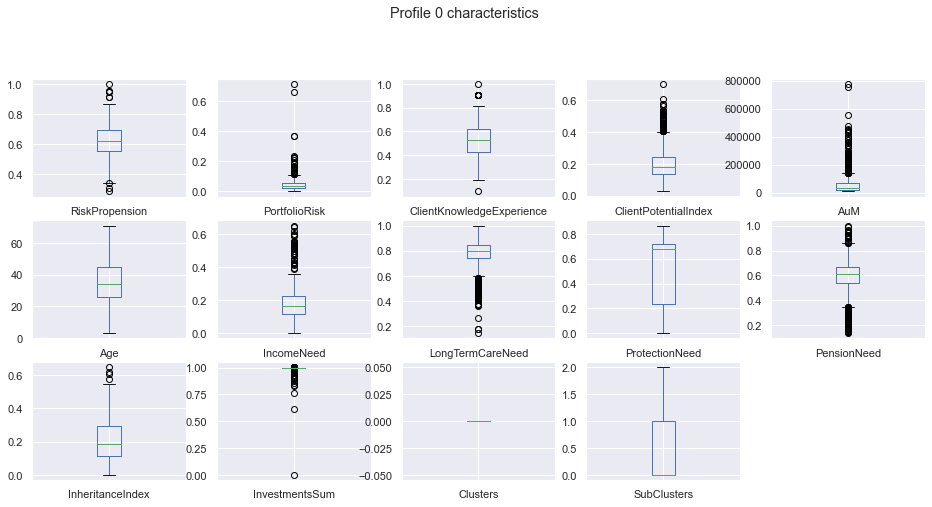

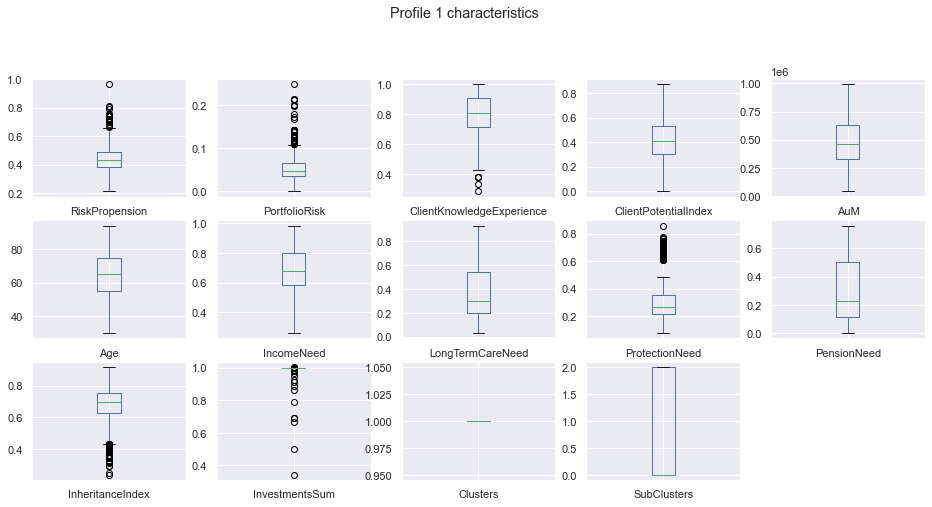

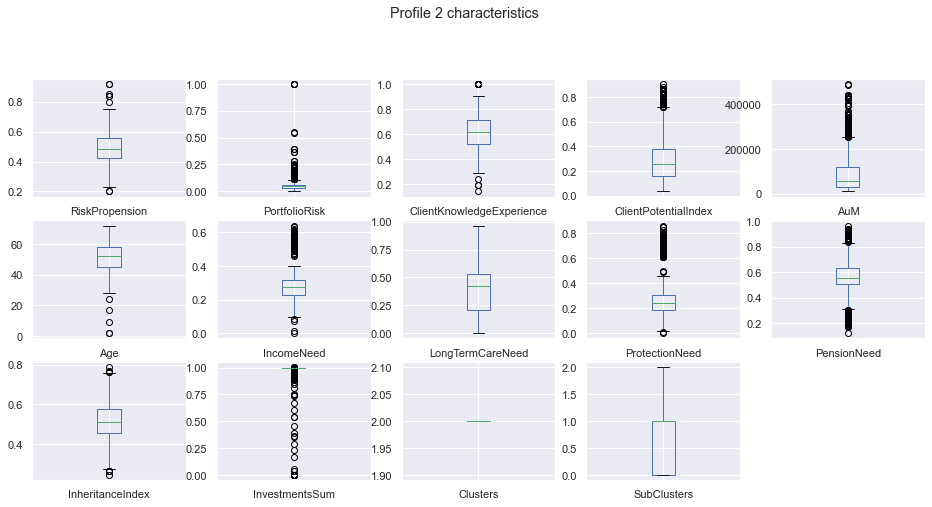

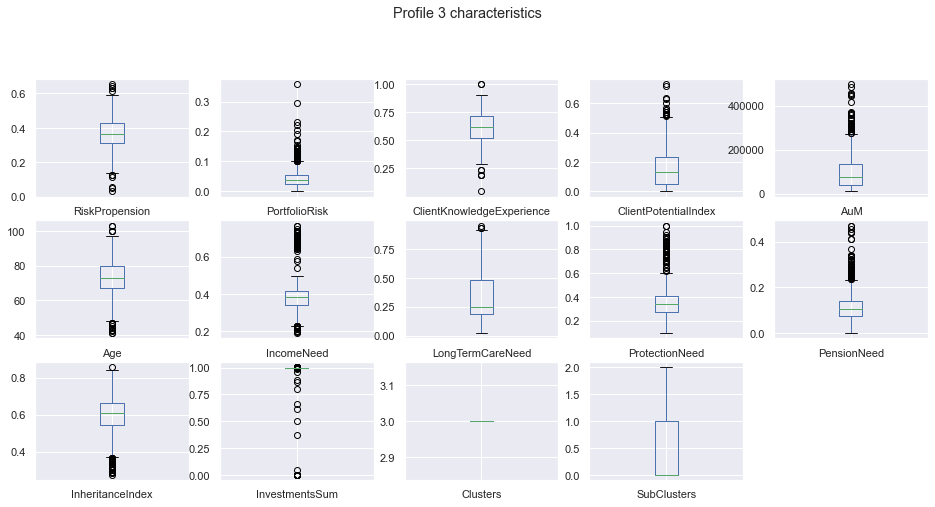

In [38]:
# we are interested in discovering the differences between profile clusters

subprof0.plot(kind='box',
        subplots=True,
        layout=(4,5),
        figsize=(16,10),
        title='Profile 0 characteristics');

subprof1.plot(kind='box',
        subplots=True,
        layout=(4,5),
        figsize=(16,10),
        title='Profile 1 characteristics');

subprof2.plot(kind='box',
        subplots=True,
        layout=(4,5),
        figsize=(16,10),
        title='Profile 2 characteristics');

subprof3.plot(kind='box',
        subplots=True,
        layout=(4,5),
        figsize=(16,10),
        title='Profile 3 characteristics');

C:\Users\emanu\anaconda\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\emanu\anaconda\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

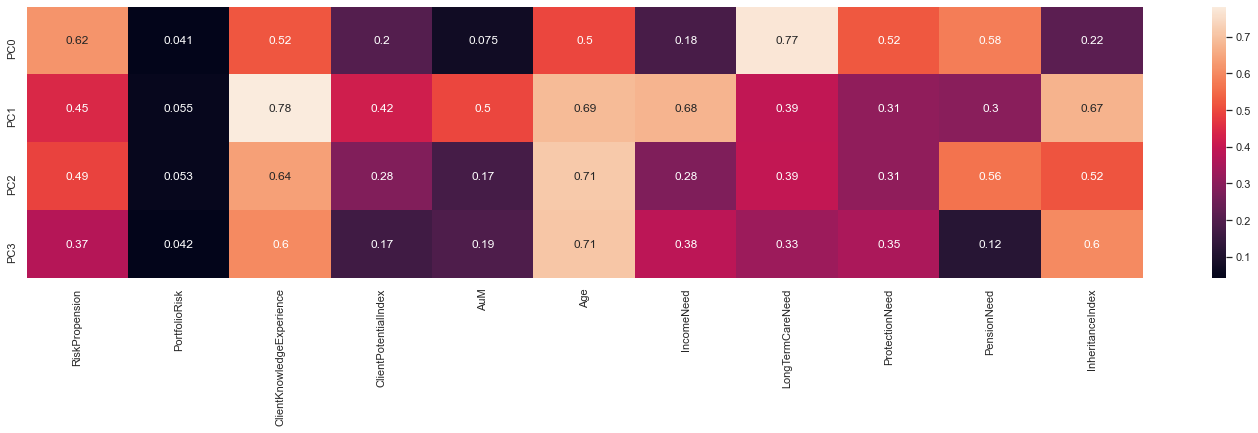

In [39]:
# AuM and Age aren't normalized, many attributes aren't numeric, I'll use the subsets so the whole profile stays as it was
subprof0.AuM = subprof0.AuM / max(subprof0.AuM)
subprof0.Age = subprof0.Age / max(subprof0.Age)
subprof0.drop(columns=['Clusters', 'SubClusters', 'InvestmentsSum'], inplace=True)

subprof1.AuM = subprof1.AuM / max(subprof1.AuM)
subprof1.Age = subprof1.Age / max(subprof1.Age)
subprof1.drop(columns=['Clusters', 'SubClusters', 'InvestmentsSum'], inplace=True)

subprof2.AuM = subprof2.AuM / max(subprof2.AuM)
subprof2.Age = subprof2.Age / max(subprof2.Age)
subprof2.drop(columns=['Clusters', 'SubClusters', 'InvestmentsSum'], inplace=True)

subprof3.AuM = subprof3.AuM / max(subprof3.AuM)
subprof3.Age = subprof3.Age / max(subprof3.Age)
subprof3.drop(columns=['Clusters', 'SubClusters', 'InvestmentsSum'], inplace=True)

averages = np.zeros(shape=(4,subprof0.shape[1]))
profiles_list = [subprof0, subprof1, subprof2, subprof3]
for i in range(4):
    for j in range(subprof0.shape[1]):
        averages[i, j] = profiles_list[i].values[:, j].mean()
averages = pd.DataFrame(data=averages, index=['PC0', 'PC1', 'PC2', 'PC3'], columns=subprof0.columns)

fig, ax = plt.subplots(figsize=(25,5))
sns.heatmap(averages, annot=True, ax=ax)

In [40]:
tab_prof = df_sub.reset_index().groupby(['ClustersProf', 'SubClustersProf']).count().unstack()['RiskPropension']
tab_prof

SubClustersProf,0,1,2
ClustersProf,,,
0,666,447,168
1,398,4,162
2,434,1165,151
3,898,261,76


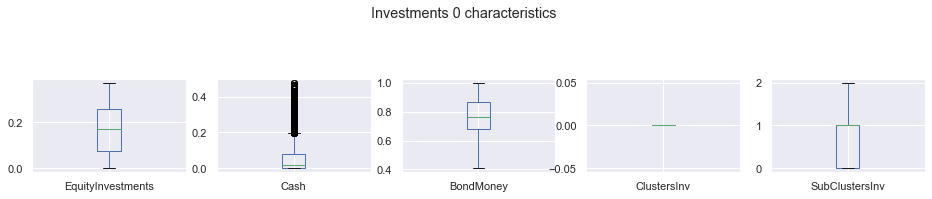

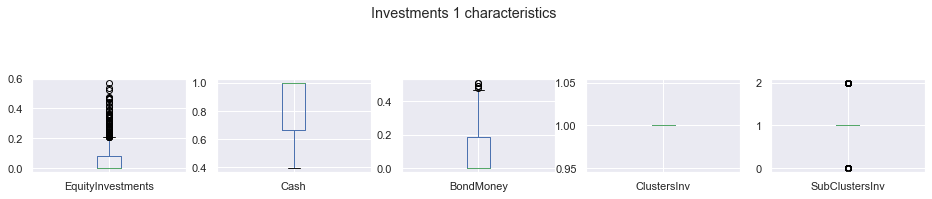

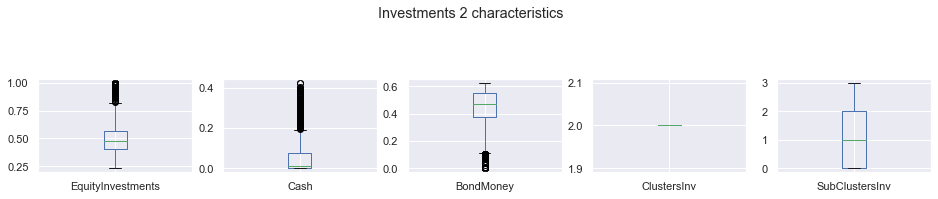

In [41]:
# we are interested in discovering the differences between investments clusters

Inv0.plot(kind='box',
        subplots=True,
        layout=(5,5),
        figsize=(16,10),
        title='Investments 0 characteristics');

Inv1.plot(kind='box',
        subplots=True,
        layout=(5,5),
        figsize=(16,10),
        title='Investments 1 characteristics');

Inv2.plot(kind='box',
        subplots=True,
        layout=(5,5),
        figsize=(16,10),
        title='Investments 2 characteristics');

C:\Users\emanu\anaconda\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

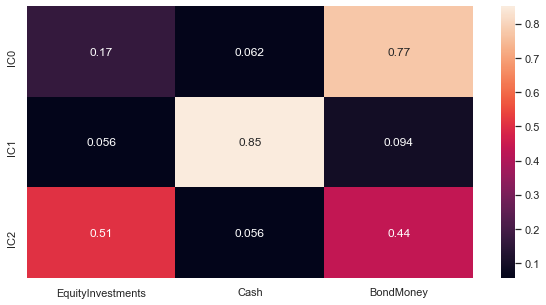

In [42]:
# AuM and Age aren't normalized, many attributes aren't numeric, I'll use the subsets so the whole profile stays as it was
Inv0.drop(columns=['ClustersInv', 'SubClustersInv'], inplace=True)

Inv1.drop(columns=['ClustersInv', 'SubClustersInv'], inplace=True)

Inv2.drop(columns=['ClustersInv', 'SubClustersInv'], inplace=True)

averages = np.zeros(shape=(3, Inv0.shape[1]))
profiles_list = [Inv0, Inv1, Inv2]
for i in range(3):
    for j in range(Inv0.shape[1]):
        averages[i, j] = profiles_list[i].values[:, j].mean()
averages = pd.DataFrame(data=averages, index=['IC0', 'IC1', 'IC2'], columns=Inv0.columns)

fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(averages, annot=True, ax=ax)

In [43]:
tab_inv = Inv_sub.reset_index().groupby(['ClustersInv', 'SubClustersInv']).count().unstack()['Cash']
tab_inv

SubClustersInv,0,1,2,3
ClustersInv,,,,
0,1177.0,1264.0,288.0,NaN
1,84.0,508.0,159.0,NaN
2,642.0,140.0,422.0,146.0


## pivot table

In [44]:
df_sub = df_sub.drop(columns=['BondInvestments', 'EquityInvestments', 'MoneyMarketInvestments', 'OtherInvestments', 'Cash'])
df_sub = df_sub.merge(inv.drop(columns=['ClustersInv']), left_index=True, right_index=True)
df_sub

,RiskPropension,PortfolioRisk,ClientKnowledgeExperience,ClientPotentialIndex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,InvestmentsSum,ClustersProf,SubClustersProf,ClustersInv,SubClustersInv,EquityInvestments,Cash,BondMoney
Client1,0.597553,0.088,0.285714,0.148466,13719,22,0.079215,0.797512,0.204401,0.633762,0.114803,1.0000,0,1,2,0,0.427000,0.000000,0.573000
Client3,0.554108,0.000,0.523810,0.243558,10233,24,0.124015,0.882995,0.769608,0.663677,0.069924,1.0000,0,2,1,1,0.000000,1.000000,0.000000
Client5,0.540528,0.038,0.428571,0.162577,222892,57,0.320086,0.907644,0.703936,0.506315,0.335057,1.0000,0,0,0,0,0.271321,0.021597,0.707082
Client10,0.557302,0.021,0.428571,0.074847,25948,52,0.214093,0.514127,0.707950,0.541626,0.488134,1.0001,0,1,0,1,0.183282,0.016598,0.800120
Client12,0.584268,0.065,0.285714,0.143558,16933,24,0.114622,0.811150,0.295798,0.675703,0.105624,1.0000,0,1,1,1,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Client4979,0.268768,0.000,0.428571,0.133129,20578,69,0.360268,0.278418,0.395041,0.101260,0.562489,1.0000,3,1,1,1,0.000000,1.000000,0.000000
Client4980,0.377883,0.059,0.428571,0.042945,449894,65,0.631625,0.252914,0.284737,0.141117,0.580935,0.9999,3,0,0,2,0.190419,0.212121,0.597460
Client4981,0.473362,0.070,0.619048,0.333129,177033,69,0.358568,0.407431,0.304010,0.116154,0.662874,1.0000,3,0,0,0,0.279700,0.000000,0.720300
Client4993,0.416852,0.029,0.619048,0.200000,71425,92,0.395251,0.138732,0.887973,0.034643,0.716359,1.0000,3,0,0,1,0.093100,0.013100,0.893800


In [45]:
pivot = df_sub.groupby(['ClustersProf', 'SubClustersProf', 'SubClustersInv', 'ClustersInv']).count().unstack().unstack()['Cash'].iloc[:, np.r_[0:3, 4:7, 8:12]].fillna(0)
pivot

ClustersInv                       0                  1                   2  \
SubClustersInv                    0      1     2     0      1     2      0   
ClustersProf SubClustersProf                                                 
0            0                133.0  168.0  63.0  16.0   94.0  45.0   65.0   
             1                 64.0   97.0  33.0  13.0  101.0  26.0   49.0   
             2                 21.0   42.0   3.0  16.0   37.0   6.0   16.0   
1            0                159.0  107.0  18.0   6.0   10.0   5.0   43.0   
             1                  0.0    0.0   0.0   0.0    1.0   0.0    2.0   
             2                 59.0   36.0   7.0   0.0    4.0   4.0   23.0   
2            0                 87.0   91.0  20.0   6.0   53.0  15.0   76.0   
             1                321.0  264.0  65.0  13.0   78.0  38.0  179.0   
             2                 25.0   36.0   5.0   3.0   12.0   1.0   45.0   
3            0                255.0  290.0  66.0  11.0   49.0  14.0  113.0   
             1                 43.0  108.0   3.0   0.0   43.0   5.0   24.0   
             2                 10.0   25.0   5.0   0.0   26.0   0.0    7.0   

ClustersInv                                      
SubClustersInv                   1      2     3  
ClustersProf SubClustersProf                     
0            0                 9.0   45.0  28.0  
             1                16.0   27.0  21.0  
             2                 9.0   14.0   4.0  
1            0                 7.0   35.0   8.0  
             1                 1.0    0.0   0.0  
             2                 7.0   21.0   1.0  
2            0                29.0   41.0  16.0  
             1                27.0  131.0  49.0  
             2                10.0   13.0   1.0  
3            0                20.0   69.0  11.0  
             1                 4.0   25.0   6.0  
             2                 1.0    1.0   1.0

In [46]:
# let's find out the differences of a particular intersection of clusters with respect to the whole data
def class_diff_whole(prof, subp, inv, subi):
    prof = df_sub[df_sub.ClustersProf == prof]
    subp = prof[prof.SubClustersProf == subp]
    inv = subp[subp.ClustersInv == inv]
    subi = inv[inv.SubClustersInv == subi]
    return subi.describe() - df_sub.describe()

class_diff_whole(3, 0, 0, 0)

,RiskPropension,PortfolioRisk,ClientKnowledgeExperience,ClientPotentialIndex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,InvestmentsSum,ClustersProf,SubClustersProf,ClustersInv,SubClustersInv,EquityInvestments,Cash,BondMoney
count,-4575.000000,-4575.000000,-4575.000000,-4575.000000,-4575.000000,-4575.000000,-4575.000000,-4575.000000,-4575.000000,-4575.000000,-4575.000000,-4575.000000,-4575.000000,-4575.000000,-4575.000000,-4575.000000,-4575.000000,-4575.000000,-4575.000000
mean,-0.121406,0.000293,0.025372,-0.042282,2533.034417,19.002655,0.067178,-0.146301,-0.046022,-0.309530,0.151184,0.001696,1.391511,-0.619255,-0.714493,-0.846377,0.018767,-0.157089,0.138322
std,-0.060382,-0.033137,-0.034581,-0.035770,-91759.625933,-7.831243,-0.085001,-0.060617,-0.115028,-0.184837,-0.105988,-0.007256,-1.131511,-0.683020,-0.873589,-0.819367,-0.156707,-0.266629,-0.226304
min,0.211874,0.012000,0.238095,0.000000,25314.000000,40.000000,0.211483,0.050435,0.158730,0.021327,0.332162,0.369400,3.000000,0.000000,0.000000,0.000000,0.173420,0.000000,0.523201
25%,-0.074284,0.011000,0.000000,-0.019632,53899.250000,25.000000,0.136500,-0.037929,0.054913,-0.072544,0.207517,0.000000,3.000000,0.000000,0.000000,0.000000,0.149541,-0.001655,0.251517
50%,-0.111941,0.004000,0.000000,-0.007975,47012.000000,19.000000,0.089853,-0.234700,0.018433,-0.405857,0.132406,0.000000,1.000000,-1.000000,0.000000,-1.000000,0.048751,-0.021235,0.089332
75%,-0.165607,-0.003000,0.000000,-0.028221,11827.750000,12.000000,0.026228,-0.264363,-0.249740,-0.476626,0.060762,0.000000,0.000000,-1.000000,-2.000000,-1.000000,-0.077224,-0.151597,-0.028025
max,-0.422550,-0.887000,-0.095238,-0.188344,-536786.000000,0.000000,-0.218687,-0.047798,-0.198398,-0.631739,-0.077589,-0.000100,0.000000,-2.000000,-2.000000,-3.000000,-0.628892,-0.803050,-0.192800


## Client evaluation

In [47]:
def client_diff_clus_new(client):
    
    # returns a table with: client values, investments sub-cluster values, and a series of warning where the difference is high.
    
    client = 'Client' + str(client)
    client = pd.DataFrame(df_sub.loc[client]).transpose()

    #prof = df_sub[df_sub.ClustersProf == client.ClustersProf.values[0]]
    #subp = prof[prof.SubClustersProf == client.SubClustersProf.values[0]]
    # we only care about investments cluster: people investing similarly to out client, regardless of their MiFid.
    inv  = df_sub[df_sub.ClustersInv == client.ClustersInv.values[0]]
    subi = inv[inv.SubClustersInv == client.SubClustersInv.values[0]]
    
    clusteravg = pd.DataFrame(subi.describe().loc['mean']).transpose().rename(index={'mean':'ClusterAvg'})
    clusterstd = pd.DataFrame(subi.describe().loc['std']).transpose().rename(index={'std':'ClusterStd'})
    vals = client.append(clusteravg).append(clusterstd)
    
    # warning if value outside of standard deviations times coefficient of variation from the mean.
    for i in vals.columns:
        try:
            if vals.loc[vals.index[0], i] < vals.loc['ClusterAvg', i]-3*vals.loc['ClusterStd', i] or vals.loc[vals.index[0], i] > vals.loc['ClusterAvg', i]+3*vals.loc['ClusterStd', i]:
                print('Warning, the', i, 'of the customer is extremely distant from the cluster average.')
            elif vals.loc[vals.index[0], i] < vals.loc['ClusterAvg', i]-2*vals.loc['ClusterStd', i] or vals.loc[vals.index[0], i] > vals.loc['ClusterAvg', i]+2*vals.loc['ClusterStd', i]:
                print('Warning, the', i, 'of the customer is very distant from the cluster average.')
            elif vals.loc[vals.index[0], i] < vals.loc['ClusterAvg', i]-vals.loc['ClusterStd', i] or vals.loc[vals.index[0], i] > vals.loc['ClusterAvg', i]+vals.loc['ClusterStd', i]:
                print('Warning, the', i, 'of the customer is quite distant from the cluster average.')
                
        except:
            pass
    print('\nSummary:\n')
    return vals

client_diff_clus_new(123)

Warning, the ProtectionNeed of the customer is quite distant from the cluster average.
Warning, the EquityInvestments of the customer is quite distant from the cluster average.
Warning, the BondMoney of the customer is quite distant from the cluster average.

Summary:



,RiskPropension,PortfolioRisk,ClientKnowledgeExperience,ClientPotentialIndex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,InvestmentsSum,ClustersProf,SubClustersProf,ClustersInv,SubClustersInv,EquityInvestments,Cash,BondMoney
Client123,0.548439,0.031000,0.714286,0.296933,102180.000000,43.000000,0.190755,0.447560,0.734223,0.571476,0.545965,1.000000,2.000000,1.000000,0.0,1.0,0.000000,0.000000,1.000000
ClusterAvg,0.487306,0.033999,0.603564,0.222862,130597.435127,57.656646,0.341265,0.452735,0.456234,0.376955,0.501236,0.997894,1.735759,0.590981,0.0,1.0,0.082049,0.034802,0.883149
ClusterStd,0.128814,0.022923,0.160183,0.165091,168602.453988,17.326929,0.169072,0.253977,0.197839,0.239030,0.182151,0.027065,1.162131,0.679724,0.0,0.0,0.064348,0.048330,0.076800


## Cluster evaluation

In [48]:
def profile_clus_eval(cluster, subcluster):
    return df_sub.loc[df_sub['ClustersProf']==2].loc[df_sub['SubClustersProf']==1].describe()
profile_clus_eval(2, 1)

,RiskPropension,PortfolioRisk,ClientKnowledgeExperience,ClientPotentialIndex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,InvestmentsSum,ClustersProf,SubClustersProf,ClustersInv,SubClustersInv,EquityInvestments,Cash,BondMoney
count,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.0,1165.0,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000
mean,0.508435,0.051668,0.662375,0.310016,118728.963090,51.065236,0.285937,0.405262,0.320080,0.557529,0.535236,0.995570,2.0,1.0,0.773391,0.844635,0.270595,0.146104,0.583301
std,0.094425,0.040973,0.145609,0.179542,80441.361112,8.691695,0.089630,0.208606,0.205012,0.114685,0.091738,0.044967,0.0,0.0,0.915772,0.886554,0.195832,0.260808,0.251677
min,0.200679,0.000000,0.190476,0.035583,19794.000000,2.000000,0.000000,0.000000,0.002533,0.122107,0.264448,0.230600,2.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.437182,0.031000,0.523810,0.177301,57063.000000,45.000000,0.229715,0.212003,0.188173,0.504330,0.473760,1.000000,2.0,1.0,0.000000,0.000000,0.119400,0.002126,0.454848
50%,0.501032,0.047000,0.619048,0.282209,94926.000000,51.000000,0.276403,0.433061,0.237950,0.551475,0.536072,1.000000,2.0,1.0,0.000000,1.000000,0.250933,0.030128,0.620400
75%,0.569760,0.062000,0.809524,0.396933,154044.000000,58.000000,0.320919,0.534544,0.313040,0.626790,0.598151,1.000000,2.0,1.0,2.000000,1.000000,0.404796,0.141743,0.760000
max,0.919779,0.551000,1.000000,0.906748,491916.000000,70.000000,0.640531,0.964156,0.797314,0.928578,0.785033,1.000200,2.0,1.0,2.000000,3.000000,0.982600,1.000000,1.000000


In [49]:
def investment_clus_eval(cluster, subcluster):
    return df_sub.loc[df_sub['ClustersInv']==cluster].loc[df_sub['SubClustersInv']==subcluster].describe()
investment_clus_eval(2, 1)

,RiskPropension,PortfolioRisk,ClientKnowledgeExperience,ClientPotentialIndex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,InvestmentsSum,ClustersProf,SubClustersProf,ClustersInv,SubClustersInv,EquityInvestments,Cash,BondMoney
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.0,140.0,140.000000,140.000000,140.000000
mean,0.492935,0.176379,0.668367,0.318300,94436.714286,51.935714,0.307221,0.482416,0.116473,0.461962,0.474394,0.996009,1.585714,0.728571,2.0,1.0,0.834979,0.067580,0.097441
std,0.118349,0.166179,0.156159,0.192046,135597.186729,17.024405,0.153021,0.272878,0.067490,0.231039,0.208751,0.032205,1.045619,0.766594,0.0,0.0,0.112024,0.097966,0.085932
min,0.168432,0.000000,0.333333,0.000000,10340.000000,16.000000,0.040935,0.075022,0.000000,0.037026,0.031086,0.661800,0.000000,0.000000,2.0,1.0,0.576400,0.000000,0.000000
25%,0.404144,0.107500,0.523810,0.155828,18163.250000,40.750000,0.206609,0.212426,0.073229,0.260752,0.347514,1.000000,1.000000,0.000000,2.0,1.0,0.750600,0.000000,0.000000
50%,0.491341,0.132000,0.619048,0.284663,38025.500000,52.000000,0.289565,0.488614,0.106374,0.519220,0.534525,1.000000,2.000000,1.000000,2.0,1.0,0.867557,0.022700,0.100000
75%,0.584200,0.173000,0.809524,0.468712,115585.000000,64.000000,0.374555,0.785668,0.149447,0.635566,0.641654,1.000000,2.000000,1.000000,2.0,1.0,0.909450,0.100267,0.174088
max,0.748404,1.000000,1.000000,0.813497,870860.000000,89.000000,0.897982,0.924709,0.417349,0.865298,0.840165,1.000100,3.000000,2.000000,2.0,1.0,1.000000,0.423600,0.265700
